## TensorFlow / Keras Basic

### TensorFlow / Keras import

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)
print(keras.__version__)

2.7.0
2.7.0


### TendorFlow / Keras 찍먹

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
x_train, x_test = x_train / 225.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2925 - accuracy: 0.9151
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1420 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1068 - accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9722
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0745 - accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9796
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9813
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9830
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0467 - accuracy: 0.9844
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0673 

[0.06730907410383224, 0.9800000190734863]

In [8]:
idx = np.random.randint(len(x_train))
image = x_train[idx]

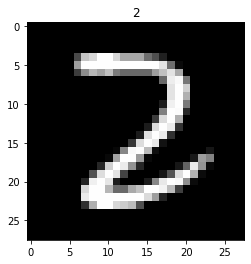

In [9]:
plt.imshow(image, cmap='gray')
plt.title(y_train[idx])
plt.show()

In [12]:
import os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print(f'User uploaded file {fn} with length {len(uploaded[fn])}')

Saving image.png to image.png
User uploaded file image.png with length 871


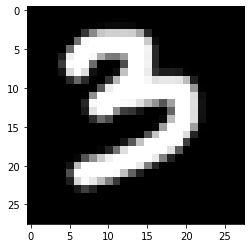

In [15]:
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')

cur_img = Image.open(img_path)
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

try:
  image = np.mean(image, axis=2)
except:
  pass

image = np.abs(255-image)
image = image.astype(np.float32) / 255.0

plt.imshow(image, cmap='gray')
plt.show()

In [17]:
image = np.reshape(image, (1, 28, 28))
print(model.predict(image))

print(f'Model이 예측한 값: {np.argmax(model.predict(image), -1)}')

[[9.0394287e-10 7.0701851e-08 1.5806650e-04 9.9928504e-01 1.0548035e-07
  8.0739170e-05 1.3464125e-07 4.6815092e-04 7.7045261e-06 9.5325191e-08]]
Model이 예측한 값: [3]


### Tensor
- Tensor는 multi-dimensional array를 나타내는 말로, TensorFlow의 기본 data type

In [18]:
hello = tf.constant([3, 3], dtype=tf.float32)
print(hello)

tf.Tensor([3. 3.], shape=(2,), dtype=float32)


In [19]:
x = tf.constant([[1.0, 2.0],
                 [3.0, 4.0]])
print(x)
print(type(x))

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [20]:
x_np = np.array([[1.0, 2.0],
                 [3.0, 4.0]])
x_list = [[1.0, 2.0],
          [3.0, 4.0]]
      
print(type(x_np))
print(type(x_list))

<class 'numpy.ndarray'>
<class 'list'>


In [22]:
x_np = tf.convert_to_tensor(x_np)
x_list = tf.convert_to_tensor(x_list)

print(type(x_np))
print(type(x_list))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [24]:
# tensor를 numy ndarray로 변환
x.numpy()

array([[1., 2.],
       [3., 4.]], dtype=float32)

In [26]:
print(type(x.numpy()))

<class 'numpy.ndarray'>


In [30]:
a = tf.ones((2, 3))
b = tf.zeros((2, 3))
c = tf.fill((2, 2), 2)

print(a)
print(b)
print(c)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[2 2]
 [2 2]], shape=(2, 2), dtype=int32)


In [31]:
# like는 shape뿐만 아니라 dtype도 동일하게 가져옴
d = tf.zeros_like(c)
e = tf.ones_like(c)

print(d)
print(e)

tf.Tensor(
[[0 0]
 [0 0]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 1]
 [1 1]], shape=(2, 2), dtype=int32)


In [32]:
# 단위행렬
f = tf.eye(3)
print(f)

tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [33]:
g = tf.range(10)
print(g)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)


In [34]:
h = tf.random.uniform((2, 2)) # np.rand
i = tf.random.normal((2, 2)) # np.rand
print(h)
print(i)

tf.Tensor(
[[0.12867618 0.3854437 ]
 [0.07312822 0.7470448 ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 1.0801558   1.5551192 ]
 [ 0.12946317 -0.04599422]], shape=(2, 2), dtype=float32)


#### Tensor의 속성

In [35]:
tensor = tf.random.normal((3, 4))

print(f'shape: {tensor.shape}')
print(f'dtype: {tensor.dtype}')

shape: (3, 4)
dtype: <dtype: 'float32'>


In [36]:
tensor = tf.reshape(tensor, (4, 3))
tensor = tf.cast(tensor, tf.int32)

print(f'Shape: {tensor.shape}')
print(f'Dtype: {tensor.dtype}')

Shape: (4, 3)
Dtype: <dtype: 'int32'>


### Variable
- Variable은 변할 수 있는 상태를 저장하는데 사용되는 특별한 텐서
- 딥러닝에서는 학습 해야하는 가중치(weight, bias)들을 variable로 생성

In [37]:
# tensor 값은 변경 불가능
tensor = tf.ones((3, 4))
print(tensor)

tensor[0, 0] = 2.

tf.Tensor(
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]], shape=(3, 4), dtype=float32)


TypeError: ignored

In [38]:
variable = tf.Variable(tensor)
print(variable)

variable[0, 0].assign(2)
print(variable)

<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32, numpy=
array([[2., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>


In [40]:
initial_value = tf.random.normal(shape=(2, 2))
weight = tf.Variable(initial_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[-1.4052532 ,  0.68216455],
       [ 0.5963795 ,  0.69673216]], dtype=float32)>


In [41]:
weight = tf.Variable(tf.random_normal_initializer(stddev=1.)(shape=(2, 2)))
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.88936424,  1.6649482 ],
       [ 0.02588239, -1.7662421 ]], dtype=float32)>


In [42]:
new_value = tf.random.normal(shape=(2, 2))
print(new_value)
weight.assign(new_value)
print(weight)

tf.Tensor(
[[ 0.9609989 -0.8092647]
 [-0.1966337 -0.4844234]], shape=(2, 2), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.9609989, -0.8092647],
       [-0.1966337, -0.4844234]], dtype=float32)>


In [44]:
added_value = tf.ones(shape=(2, 2))

weight.assign_add(added_value)
print(weight)

weight.assign_sub(added_value)
print(weight)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1.9609989 , 0.19073528],
       [0.8033663 , 0.5155766 ]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.9609989, -0.8092647],
       [-0.1966337, -0.4844234]], dtype=float32)>


### Indexing & Slicing

In [45]:
a = tf.range(1, 13)
a = tf.reshape(a, (3, 4))
print(a)

tf.Tensor(
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]], shape=(3, 4), dtype=int32)


In [46]:
print(a[1])
print(a[0, -1])

tf.Tensor([5 6 7 8], shape=(4,), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


In [47]:
print(a[1:-1])
print(a[:2, 2:])

tf.Tensor([[5 6 7 8]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[3 4]
 [7 8]], shape=(2, 2), dtype=int32)


### Transpose

In [48]:
a = tf.range(16)
a = tf.reshape(a, (2, 2, -1))
print(a)

tf.Tensor(
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]], shape=(2, 2, 4), dtype=int32)


In [49]:
b = tf.transpose(a, (2, 0, 1))
print(b)

tf.Tensor(
[[[ 0  4]
  [ 8 12]]

 [[ 1  5]
  [ 9 13]]

 [[ 2  6]
  [10 14]]

 [[ 3  7]
  [11 15]]], shape=(4, 2, 2), dtype=int32)


### Tensor 연산

In [50]:
x = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
y = tf.constant([[5, 6], [7, 8]], dtype=tf.float32)

print(x)
print(y)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5. 6.]
 [7. 8.]], shape=(2, 2), dtype=float32)


In [51]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print('='*30)
print(tf.add(x, y))
print(tf.subtract(x, y))
print(tf.multiply(x, y))
print(tf.matmul(x, y))

tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[0.2        0.33333334]
 [0.42857143 0.5       ]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 6.  8.]
 [10. 12.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[-4. -4.]
 [-4. -4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[ 5. 12.]
 [21. 32.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[19. 22.]
 [43. 50.]], shape=(2, 2), dtype=float32)


In [52]:
z = tf.range(1, 11)
z = tf.reshape(z, (2, 5))
print(z)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(2, 5), dtype=int32)


In [53]:
print(tf.reduce_sum(z))

tf.Tensor(55, shape=(), dtype=int32)


In [54]:
sum1 = tf.reduce_sum(z, axis=0)
sum2 = tf.reduce_sum(z, axis=1)
sum3 = tf.reduce_sum(z, axis=-1)

print(sum1)
print(sum2)
print(sum3)

tf.Tensor([ 7  9 11 13 15], shape=(5,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)
tf.Tensor([15 40], shape=(2,), dtype=int32)


In [56]:
# 차원 유지
concat = tf.concat([z, z], axis=0)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]
 [ 6  7  8  9 10]], shape=(4, 5), dtype=int32)


In [57]:
concat = tf.concat([z, z], axis=1)
print(concat)

tf.Tensor(
[[ 1  2  3  4  5  1  2  3  4  5]
 [ 6  7  8  9 10  6  7  8  9 10]], shape=(2, 10), dtype=int32)


In [58]:
# 차원 증가
stack = tf.stack([z, z], axis=0)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 6  7  8  9 10]]

 [[ 1  2  3  4  5]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)


In [59]:
stack = tf.stack([z, z], axis=-1)
print(stack)

tf.Tensor(
[[[ 1  1]
  [ 2  2]
  [ 3  3]
  [ 4  4]
  [ 5  5]]

 [[ 6  6]
  [ 7  7]
  [ 8  8]
  [ 9  9]
  [10 10]]], shape=(2, 5, 2), dtype=int32)


In [60]:
stack = tf.stack([z, z], axis=1)
print(stack)

tf.Tensor(
[[[ 1  2  3  4  5]
  [ 1  2  3  4  5]]

 [[ 6  7  8  9 10]
  [ 6  7  8  9 10]]], shape=(2, 2, 5), dtype=int32)
